In [11]:
%matplotlib inline
from csv import reader
import matplotlib
import numpy as np

import matplotlib.pyplot as pyplot
import matplotlib.patches as mpatches

with open('report_train.csv', 'r') as f:
    data_train = list(reader(f))
    
with open('report_test.csv', 'r') as f:
    data_test = list(reader(f))
    
    
n_words = 5000

# ["Filename", "Loss", "Test Set:"]    
loss_train = [i[1] for i in data_train[1::]]

# ["File", "Label", "Pred", "Loss", "CE", "CER", "WER", "WER_LIB", "Test Set:"]   
loss_test = [i[3] for i in data_test[1::]]
ce_test = [i[4] for i in data_test[1::]]  # CER
cer_test = [i[5] for i in data_test[1::]]  # CER normalized
wer_test = [i[6] for i in data_test[1::]]
werlib_test = [i[7] for i in data_test[1::]]

print("Prepared Data")

# Training Data
loss2_train = [float(i[1:-1]) for i in loss_train]
# Test Data
loss2_test = [float(i[1:-1].split(',')[0]) for i in loss_test]  #loss2_test = [float(i) for i in loss_test]  #
cer2_test = [np.fromstring(i[1:-1], sep=',') for i in cer_test]
wer2_test = [np.fromstring(i[1:-1], sep=',') for i in wer_test]

print((cer2_test[0][0]))

Prepared Data
0


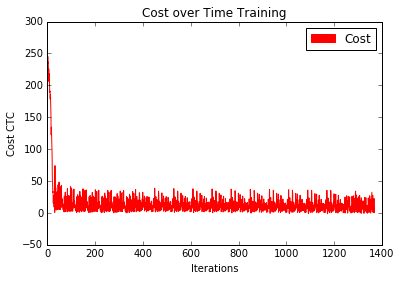

1369
Done


In [12]:
#  Cost / Acc over time\n",
#pyplot.plot(range(len(cost_train)), loss_train, 'r', range(len(acc_train)), acc_train, 'b')
pyplot.plot(range(len(loss2_train)), loss2_train, 'r')
#  legend\n",
red_patch = mpatches.Patch(color='red', label='Cost')
#blue_patch = mpatches.Patch(color='blue', label='Accuracy')
#pyplot.legend(handles=[blue_patch, red_patch])
pyplot.legend(handles=[red_patch])
#  Title and axis\n",
pyplot.title('Cost over Time Training')
pyplot.xlabel('Iterations')
pyplot.ylabel('Cost CTC')
pyplot.show()

print(len(loss2_train))
print("Done")

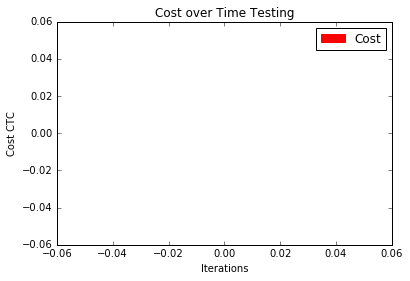

CER last 13000 words =  0.0
WER last 13000 words =  0.0
Done


In [10]:
#  Cost / Acc over time\n",
#pyplot.plot(range(len(cost_train)), loss_train, 'r', range(len(acc_train)), acc_train, 'b')
pyplot.plot(range(len(loss2_test)), loss2_test, 'r')
#  legend\n",
red_patch = mpatches.Patch(color='red', label='Cost')
#blue_patch = mpatches.Patch(color='blue', label='Accuracy')
#pyplot.legend(handles=[blue_patch, red_patch])
pyplot.legend(handles=[red_patch])
#  Title and axis\n",
pyplot.title('Cost over Time Testing')
pyplot.xlabel('Iterations')
pyplot.ylabel('Cost CTC')
pyplot.show()

print("CER last",n_words, "words = ", np.sum(cer2_test[-n_words:]))
print("WER last",n_words, "words = ", np.sum(wer2_test[-n_words:]))

print("Done")